In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

#參考文章：https://www.kaggle.com/nishimoto/very-simple-linear-models-pls

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [103]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
testID = test['Id']

#data = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#data.drop(['Id'], axis=1, inplace=True)
#df_all = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
#df_all.drop(['Id'], axis=1, inplace=True)

In [104]:
print(f"train shape : {train.shape}")
print(f" test shape : {test.shape}")

train shape : (1460, 81)
 test shape : (1459, 80)


In [105]:
#瞭解資料型別
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [106]:
train.corr('kendall')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.014198,-0.022489,-0.003550,-0.020898,0.002698,-0.004035,-0.008415,-0.026222,-0.009105,...,-0.031211,-0.002009,-0.005360,-0.029802,0.004762,0.045303,-0.035251,0.013966,0.001326,-0.012030
MSSubClass,0.014198,1.000000,-0.236067,-0.200790,0.083506,-0.057833,0.010922,-0.003649,0.018061,-0.079554,...,0.018110,0.025413,0.010590,-0.031583,-0.018751,0.029447,-0.028830,0.014059,-0.021802,-0.003979
LotFrontage,-0.022489,-0.236067,1.000000,0.510666,0.193309,-0.065029,0.138978,0.083595,0.197848,0.112092,...,0.080382,0.129485,-0.075647,0.052914,0.035484,0.069963,0.019833,0.018147,0.002403,0.290361
LotArea,-0.003550,-0.200790,0.510666,1.000000,0.173136,-0.036164,0.074436,0.053329,0.132267,0.120827,...,0.133455,0.126485,-0.051719,0.050724,0.074070,0.068907,0.048161,0.004481,-0.020255,0.314174
OverallQual,-0.020898,0.083506,0.193309,0.173136,1.000000,-0.152513,0.505804,0.437687,0.341051,0.104062,...,0.209439,0.346309,-0.139530,0.029395,0.040856,0.050609,-0.078040,0.047233,-0.020327,0.669660
OverallCond,0.002698,-0.057833,-0.065029,-0.036164,-0.152513,1.000000,-0.329379,-0.031641,-0.149822,-0.012308,...,-0.035247,-0.107522,0.097942,0.029930,0.068009,-0.005175,0.079860,-0.005585,0.042257,-0.103492
YearBuilt,-0.004035,0.010922,0.138978,0.074436,0.505804,-0.329379,1.000000,0.624893,0.300645,0.151742,...,0.204089,0.284283,-0.324028,0.018436,-0.058717,0.007335,-0.075164,0.012968,-0.009402,0.470960
YearRemodAdd,-0.008415,-0.003649,0.083595,0.053329,0.437687,-0.031641,0.624893,1.000000,0.176332,0.051501,...,0.165740,0.255900,-0.187786,0.042759,-0.037362,0.002328,-0.074961,0.015121,0.034830,0.412955
MasVnrArea,-0.026222,0.018061,0.197848,0.132267,0.341051,-0.149822,0.300645,0.176332,1.000000,0.187837,...,0.144636,0.167763,-0.156450,0.036891,0.033783,0.004388,-0.044981,0.013728,0.000542,0.321250
BsmtFinSF1,-0.009105,-0.079554,0.112092,0.120827,0.104062,-0.012308,0.151742,0.051501,0.187837,1.000000,...,0.133494,0.059288,-0.121551,0.039480,0.059671,0.048757,0.004331,-0.012748,0.016072,0.220879


In [107]:
# 描述data物件型態的統計資訊（個數、種類、出現頻率最高的種類及其次數）
print(f"categorical features: {train.describe(include='O').shape}")
# 查詢非數值資訊
train.describe(include="O")

categorical features: (4, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## EDA (Drop Outlier)

In [108]:
# 描述data數值型態的統計資訊（個數、平均、標準差、最小值、
#                           第一四分位數、第二四分位數、第三四分位數
#                           、最大值）
print(f"numerical feature: {train['Utilities'].describe().shape}")
      
# 瞭解資料的分佈情況
train.describe()

numerical feature: (4,)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [109]:
## EDA (Drop Outlier)

In [110]:
train.shape

(1460, 81)

In [111]:
# It helps to drop outliers for relevant features
# 相關係數
# decision tree找出重要的feature或xbost
# PCA䧏維度
# dnn的autoencoding來降維

#plt.plot(train.GrLivArea, train.SalePrice, '.' )
#plt.xlabel('GrLivArea')
#plt.ylabel('SalePrice')
#print( train[ train.GrLivArea > 4000 ].SalePrice ) #中刮號放條件

Series([], Name: SalePrice, dtype: int64)


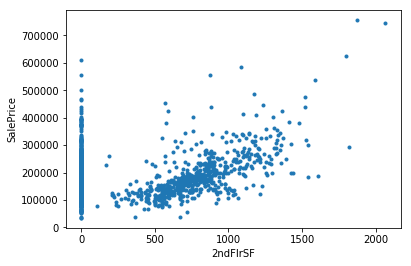

In [112]:
# 1stFlrSF seems relevant
plt.plot(train['2ndFlrSF'], train['SalePrice'], '.')
plt.xlabel('2ndFlrSF')
plt.ylabel('SalePrice')
print( train[ train['2ndFlrSF'] > 3000 ].SalePrice )

KeyError: '[ 856 1262  920 ... 1188 1078 1256] not in index'

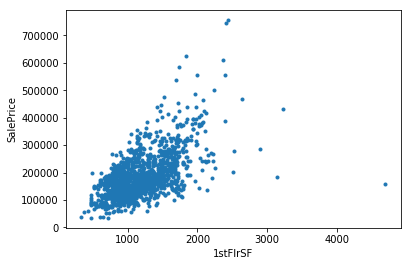

In [113]:
# GrLivArea seems relevant
# 會發現>4000有離群值
#plt.plot(train['GrLivArea'], train['SalePrice'], '.')
#plt.xlabel('GrLivArea')
#plt.ylabel('SalePrice')
#print( train[ train['GrLivArea'] ].SalePrice )

# LotArea seems relevant
# GrLivArea>4000有離群值
# LotArea>60000
# LotFrontage>300
# 1stFlrSF>3000
# 2ndFlrSF>2000
plt.plot(train['1stFlrSF'], train['SalePrice'], '.')
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
print( train[ train['1stFlrSF'] ].SalePrice )

In [ ]:
#價錢的分佈
sns.distplot(train.SalePrice)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


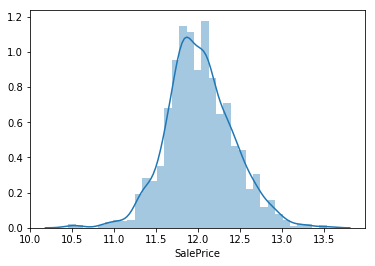

In [114]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
sns.distplot(np.log(train.SalePrice))

(-0.5, 9.5, 0, 800000)

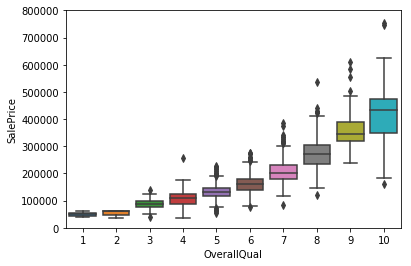

In [115]:
# 觀察相關係數
# 適合分群資料
# LotShape         1460 non-null object
# LandContour      1460 non-null object
# Utilities        1460 non-null object
# LotConfig        1460 non-null object
# LandSlope        1460 non-null object
# Neighborhood     1460 non-null object
# Condition1       1460 non-null object
# Condition2       1460 non-null object
# BldgType         1460 non-null object
# HouseStyle       1460 non-null object

# 可以看出OverallQual有很大的正相關
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train['OverallQual']],axis=1)
fig = sns.boxplot(x=var, y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

KeyError: '[2003 1976 2001 ... 1941 1950 1965] not in index'

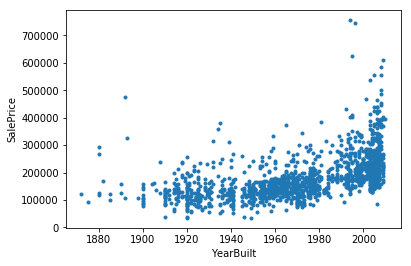

In [116]:
# 可以看出OverallQual有很大的正相關

plt.plot(train['YearBuilt'], train['SalePrice'], '.')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
print( train[ train['YearBuilt'] ].SalePrice )

In [ ]:
#scatterplot
# 畫出散狀圖, 'GarageCars', 'TotalBsmtSF', 'FullBath', 'OverallQual',
sns.set()
cols = ['SalePrice', 'GrLivArea' , 'YearBuilt']
#sns.pairplot(train[cols], size = 5)
#plt.show();

In [ ]:
# 資料清洗
# 統計一下null資料的Frequency
count_nans=len(train)-train.count()
df_count_nans= count_nans.to_frame()
df_count_nans.columns=['train_nan_count']
df_count_nans['%_train_nans']=(df_count_nans['train_nan_count']/train.shape[0])*100
df_count_nans['test_nan_count']=len(test)-test.count()
df_count_nans['%_test_nans']=(df_count_nans['test_nan_count']/train.shape[0])*100
df_count_nans.sort_values("train_nan_count",ascending=False,inplace=False)
df_count_nans.query('test_nan_count >0 or train_nan_count>0')

In [117]:
# drop掉離群值
#https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force

print( train[ (train.GrLivArea > 4500) & (train['SalePrice']<300000) ].SalePrice )
train = train.drop( labels = train[ (train.GrLivArea > 4500) & (train['SalePrice']<300000) ].index, axis = 0 )

523     184750
1298    160000
Name: SalePrice, dtype: int64


In [118]:

print(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].SalePrice )
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)

457    256000
Name: SalePrice, dtype: int64


In [119]:
# drop掉離群值(有效的)
# GrLivArea>4000有離群值
# LotArea>60000
# LotFrontage>300
# 1stFlrSF>3000
# 2ndFlrSF>2000

print( train[ train.LotArea > 60000 ].SalePrice )
train = train.drop( labels = train[ train.LotArea > 60000 ].index, axis = 0 )

249    277000
313    375000
335    228950
451    280000
706    302000
Name: SalePrice, dtype: int64


In [120]:

print( train[ train.LotFrontage > 300 ].SalePrice )
train = train.drop( labels = train[ train.LotFrontage > 300 ].index, axis = 0 )

934    242000
Name: SalePrice, dtype: int64


In [121]:
print( train[ train['2ndFlrSF'] > 2000 ].SalePrice )
train = train.drop( labels = train[ train['2ndFlrSF'] > 2000 ].index, axis = 0 )

1182    745000
Name: SalePrice, dtype: int64


In [122]:
print( train[ train['1stFlrSF'] > 3000 ].SalePrice )
train = train.drop( labels = train[ train['1stFlrSF'] > 3000 ].index, axis = 0 )

496    430000
Name: SalePrice, dtype: int64


In [123]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [124]:
#取得數值型態的欄位
#取得數值型態欄位
numeric_data = train._get_numeric_data()
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

## sketch pics


there are 0 NaN in Id
there are 254 NaN in LotFrontage
there are 0 NaN in LotArea
there are 0 NaN in OverallQual
there are 0 NaN in OverallCond
there are 0 NaN in YearBuilt
there are 0 NaN in YearRemodAdd
there are 8 NaN in MasVnrArea
there are 0 NaN in BsmtFinSF1
there are 0 NaN in BsmtFinSF2
there are 0 NaN in BsmtUnfSF
there are 0 NaN in TotalBsmtSF
there are 0 NaN in 1stFlrSF
there are 0 NaN in 2ndFlrSF
there are 0 NaN in LowQualFinSF
there are 0 NaN in GrLivArea
there are 0 NaN in BsmtFullBath
there are 0 NaN in BsmtHalfBath
there are 0 NaN in FullBath
there are 0 NaN in HalfBath
there are 0 NaN in BedroomAbvGr
there are 0 NaN in KitchenAbvGr
there are 0 NaN in TotRmsAbvGrd
there are 0 NaN in Fireplaces
there are 81 NaN in GarageYrBlt
there are 0 NaN in GarageCars
there are 0 NaN in GarageArea
there are 0 NaN in WoodDeckSF
there are 0 NaN in OpenPorchSF
there are 0 NaN in EnclosedPorch
there are 0 NaN in 3SsnPorch
there are 0 NaN in ScreenPorch
there are 0 NaN in PoolArea
there ar

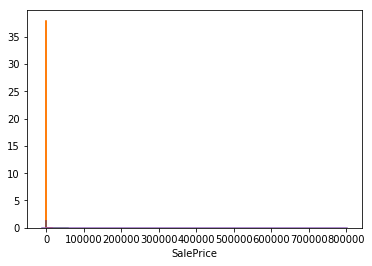

In [125]:
# drop掉每個欄位的NA值並劃出其分布
for i in numeric_data:
    temp = train[i].dropna()
    print(f"there are {train[i].shape[0] - temp.shape[0]} NaN in {i}")
    sns.distplot(temp) 
    #plt.show()

## Drop Null Feature(s)

In [126]:
#df_all = pd.concat( [ train.drop( [ 'Id', 'SalePrice' ], axis = 1 ),
#                      test.drop( [ 'Id' ], axis = 1 ) ],
#                      axis = 0, ignore_index = False )
df_all = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
df_all.drop(['Id'], axis=1, inplace=True)

In [127]:
# check null status
print( df_all.shape )
df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()
print( df_na[ df_na > 100 ].sort_values(ascending=False) )

(2908, 79)
LotFrontage    481
GarageYrBlt    159
dtype: int64


In [128]:
# drop掉大多為Null的欄位
df_all = df_all.drop(['LotFrontage'], axis = 1) # for 486 null values (train + test)
print( df_all.shape )

(2908, 78)


In [129]:
# drop掉大多為Null的欄位
df_all = df_all.drop(['GarageYrBlt'], axis = 1) # for 159 null values
print(df_all.shape)

(2908, 77)


In [130]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['PoolQC','Alley','MiscFeature','Fence'], axis = 1) # for 159 null valuesprint(df_all.shape)

In [131]:
# drop掉大多為Null的欄位


In [132]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['PoolQC'], axis = 1) # for 159 null values
#print(df_all.shape)

In [133]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['Fence'], axis = 1) # for 159 null values
#print(df_all.shape)

In [134]:
# drop掉大多為Null的欄位
#df_all = df_all.drop(['MiscFeature'], axis = 1) # for 159 null values
#print(df_all.shape)

In [135]:
#df_all.info()
df_all["Electrical"]

train  0       SBrkr
       1       SBrkr
       2       SBrkr
       3       SBrkr
       4       SBrkr
       5       SBrkr
       6       SBrkr
       7       SBrkr
       8       FuseF
       9       SBrkr
       10      SBrkr
       11      SBrkr
       12      SBrkr
       13      SBrkr
       14      SBrkr
       15      FuseA
       16      SBrkr
       17      SBrkr
       18      SBrkr
       19      SBrkr
       20      SBrkr
       21      FuseF
       22      SBrkr
       23      SBrkr
       24      SBrkr
       25      SBrkr
       26      SBrkr
       27      SBrkr
       28      SBrkr
       29      SBrkr
               ...  
test   1429    SBrkr
       1430    SBrkr
       1431    SBrkr
       1432    SBrkr
       1433    SBrkr
       1434    SBrkr
       1435    SBrkr
       1436    SBrkr
       1437    SBrkr
       1438    SBrkr
       1439    SBrkr
       1440    SBrkr
       1441    SBrkr
       1442    SBrkr
       1443    SBrkr
       1444    FuseA
       1445  

In [136]:
# Numerical features
# 剔除不必要的欄位
num_feats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 
             'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
             'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
             'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal',
             'YrSold','Electrical']    

# We need to convert literal grades to a numerical scale
#grades = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
#          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
#literal = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
#num = [9, 7, 5, 3, 2]
#G = dict(zip(literal, num))

#data[grades] = df_all[grades].replace(G)

# Categorical features: everything that is not 'numerical'
#cat_feats = df_all.drop(num_feats, axis=1).columns


# missing value selection
# I borrow code from
# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
#df_all["PoolQC"] = df_all["PoolQC"].fillna("None")
#df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")
#df_all["Alley"] = df_all["Alley"].fillna("None")
#df_all["Fence"] = df_all["Fence"].fillna("None")

#df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
#df_all = df_all.drop(['Utilities'], axis=1)
#df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

#df_all["Functional"] = df_all["Functional"].fillna("Typ")
#df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")
#df_all["MasVnrType"] = df_all["MasVnrType"].fillna("None")
#df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0)
#df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
#df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
#df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
#df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])
#df_all['MSSubClass'] = df_all['MSSubClass'].fillna("None")

In [137]:
df_all['BsmtQual'].describe()

count     2827
unique       4
top         TA
freq      1282
Name: BsmtQual, dtype: object

In [138]:
df_all['Alley'] = df_all['Alley'].fillna('missing')
df_all['PoolQC'] = df_all['PoolQC'].fillna(df_all['PoolQC'].mode()[0])


df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna(df_all['FireplaceQu'].mode()[0])
#df_all["GarageYrBlt"] = df_all["GarageYrBlt"].fillna(0,inplace=True)
# 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
#df_all["GarageCars"] = df_all["GarageCars"].fillna("None",inplace=True)
#df_all["GarageArea"] = df_all["GarageArea"].fillna("None",inplace=True)
df_all['GarageArea'] = df_all['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df_all['GarageCars'] = df_all['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
#df_all["GarageQual"] = df_all["GarageQual"].fillna("None",inplace=True)
#df_all["GarageCond"] = df_all["GarageCond"].fillna("None",inplace=True)
df_all["GarageType"] = df_all["GarageType"].fillna("Missing",inplace=True)
df_all['GarageFinish'] = df_all['GarageFinish'].fillna(df_all['GarageFinish'].mode()[0])
df_all['GarageQual'] = df_all['GarageQual'].fillna(df_all['GarageQual'].mode()[0])
df_all['GarageCond'] = df_all['GarageCond'].fillna('missing')

df_all["MasVnrType"] = df_all["MasVnrType"].fillna("None",inplace=True)
df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0)


#'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
#'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
#df_all["BsmtQual"] = df_all["BsmtQual"].fillna(df_all['BsmtQual'].mode()[0])
#df_all["BsmtCond"] = df_all["BsmtCond"].fillna(df_all['BsmtCond'].mode()[0])
df_all["BsmtQual"] = df_all["BsmtQual"].fillna("None")
df_all["BsmtCond"] = df_all["BsmtCond"].fillna("None")
df_all["BsmtFinSF1"] = df_all["BsmtFinSF2"].fillna("None",inplace=True)
df_all["BsmtUnfSF"] = df_all["BsmtUnfSF"].fillna("None",inplace=True)
df_all['BsmtExposure'] = df_all['BsmtExposure'].fillna(df_all['BsmtExposure'].mode()[0])
df_all['BsmtFinType1'] = df_all['BsmtFinType1'].fillna('missing')
df_all['BsmtFinType2'] = df_all['BsmtFinType2'].fillna('missing')
    
###df_all["TotalBsmtSF"] = df_all["TotalBsmtSF"].fillna(0,inplace=True)
df_all["1stFlrSF"] = df_all["1stFlrSF"].fillna("None",inplace=True)
#df_all["2ndFlrSF"] = df_all["2ndFlrSF"].fillna("None",inplace=True)
df_all["LowQualFinSF"] = df_all["LowQualFinSF"].fillna("None",inplace=True)
#df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df_all['2ndFlrSF'] = df_all['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)


#most_common=df_all["Electrical"].value_counts().index[0]
#df_all["Electrical"] = df_all["Electrical"].fillna("None",inplace=True)
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])

#df_all["Functional"] = df_all["Functional"].fillna("Typ")
#df_all["KitchenQual"] = df_all["KitchenQual"].fillna("TA")
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
df_all["Functional"] = df_all["Functional"].fillna("Typ")
    
#most_common=df_all["SaleType"].value_counts().index[0]
#df_all["SaleType"] = df_all["SaleType"].fillna("None",inplace=True)
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])
df_all['SaleCondition'] = df_all['SaleCondition'].fillna('missing')

df_all['Exterior1st'] = df_all['Exterior1st'].fillna("None")
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna("None")

#most_common=df_all["MSZoning"].value_counts().index[0]
df_all["MSZoning"] = df_all["MSZoning"].fillna("None")

#grp=df_all.groupby("Neighborhood")["GarageCars"].mean()
#nan_idx=df_all[df_all["GarageCars"].isnull()==true].index.tolist()
#for idx in nan_idx:
#    df_all[idx,"GarageCars"]=int(round(grp.loc[df_all.iloc[idx]["Neighborhood"]]))
    
#grp=df_all.groupby("Neighborhood")["GarageArea"].mean()
#nan_idx=df_all[df_all["GarageArea"].isnull()==true].index.tolist()
#for idx in nan_idx:
#    df_all[idx,"GarageArea"]=int(round(grp.loc[df_all.iloc[idx]["Neighborhood"]]))
    

df_all['Fence'] = df_all['Fence'].fillna('missing')
df_all['Street'] = df_all['Street'].fillna('missing')
df_all['LotShape'] = df_all['LotShape'].fillna('missing')
df_all['LandContour'] = df_all['LandContour'].fillna('missing')
df_all['CentralAir'] = df_all['CentralAir'].fillna('missing')
df_all['MiscFeature'] = df_all['MiscFeature'].fillna('missing')
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])    
df_all['Utilities'] = df_all['Utilities'].fillna('missing')
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])    
 
#'LotFrontage',
flist = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
         'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
         'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
         'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
         'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for fl in flist:
    df_all[fl] = df_all[fl].fillna(0)
        
#df_all["LotFrontage"] = df_all.groupby("BldgType")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#df_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

df_all['TotalSF'] = df_all['TotalBsmtSF'] + df_all['1stFlrSF'] + df_all['2ndFlrSF']

In [139]:
# Working with ordinal predictors
def QualToInt(x):
    if(x=='Ex'):
        r = 0
    elif(x=='Gd'):
        r = 1
    elif(x=='TA'):
        r = 2
    elif(x=='Fa'):
        r = 3
    elif(x=='missing'):
        r = 4
    else:
        r = 5
    return r

df_all['ExterQual'] = df_all['ExterQual'].apply(QualToInt)
df_all['ExterCond'] = df_all['ExterCond'].apply(QualToInt)
df_all['KitchenQual'] = df_all['KitchenQual'].apply(QualToInt)
df_all['HeatingQC'] = df_all['HeatingQC'].apply(QualToInt)
df_all['BsmtQual'] = df_all['BsmtQual'].apply(QualToInt)
df_all['BsmtCond'] = df_all['BsmtCond'].apply(QualToInt)
df_all['FireplaceQu'] = df_all['FireplaceQu'].apply(QualToInt)
df_all['GarageQual'] = df_all['GarageQual'].apply(QualToInt)
df_all['PoolQC'] = df_all['PoolQC'].apply(QualToInt)

def SlopeToInt(x):
    if(x=='Gtl'):
        r = 0
    elif(x=='Mod'):
        r = 1
    elif(x=='Sev'):
        r = 2
    else:
        r = 3
    return r

df_all['LandSlope'] = df_all['LandSlope'].apply(SlopeToInt)
df_all['CentralAir'] = df_all['CentralAir'].apply( lambda x: 0 if x == 'N' else 1) 
df_all['Street'] = df_all['Street'].apply( lambda x: 0 if x == 'Pave' else 1) 
df_all['PavedDrive'] = df_all['PavedDrive'].apply( lambda x: 0 if x == 'Y' else 1)

def GFinishToInt(x):
    if(x=='Fin'):
        r = 0
    elif(x=='RFn'):
        r = 1
    elif(x=='Unf'):
        r = 2
    else:
        r = 3
    return r

df_all['GarageFinish'] = df_all['GarageFinish'].apply(GFinishToInt)

def BsmtExposureToInt(x):
    if(x=='Gd'):
        r = 0
    elif(x=='Av'):
        r = 1
    elif(x=='Mn'):
        r = 2
    elif(x=='No'):
        r = 3
    else:
        r = 4
    return r
df_all['BsmtExposure'] = df_all['BsmtExposure'].apply(BsmtExposureToInt)

def FunctionalToInt(x):
    if(x=='Typ'):
        r = 0
    elif(x=='Min1'):
        r = 1
    elif(x=='Min2'):
        r = 1
    else:
        r = 2
    return r

df_all['Functional_int'] = df_all['Functional'].apply(FunctionalToInt)


def HouseStyleToInt(x):
    if(x=='1.5Unf'):
        r = 0
    elif(x=='SFoyer'):
        r = 1
    elif(x=='1.5Fin'):
        r = 2
    elif(x=='2.5Unf'):
        r = 3
    elif(x=='SLvl'):
        r = 4
    elif(x=='1Story'):
        r = 5
    elif(x=='2Story'):
        r = 6  
    elif(x==' 2.5Fin'):
        r = 7          
    else:
        r = 8
    return r

df_all['HouseStyle_int'] = df_all['HouseStyle'].apply(HouseStyleToInt)
df_all['HouseStyle_1st'] = 1*(df_all['HouseStyle'] == '1Story')
df_all['HouseStyle_2st'] = 1*(df_all['HouseStyle'] == '2Story')
df_all['HouseStyle_15st'] = 1*(df_all['HouseStyle'] == '1.5Fin')

def FoundationToInt(x):
    if(x=='PConc'):
        r = 3
    elif(x=='CBlock'):
        r = 2
    elif(x=='BrkTil'):
        r = 1        
    else:
        r = 0
    return r

df_all['Foundation_int'] = df_all['Foundation'].apply(FoundationToInt)

def MasVnrTypeToInt(x):
    if(x=='Stone'):
        r = 3
    elif(x=='BrkFace'):
        r = 2
    elif(x=='BrkCmn'):
        r = 1        
    else:
        r = 0
    return r

df_all['MasVnrType_int'] = df_all['MasVnrType'].apply(MasVnrTypeToInt)

def BsmtFinType1ToInt(x):
    if(x=='GLQ'):
        r = 6
    elif(x=='ALQ'):
        r = 5
    elif(x=='BLQ'):
        r = 4
    elif(x=='Rec'):
        r = 3   
    elif(x=='LwQ'):
        r = 2
    elif(x=='Unf'):
        r = 1        
    else:
        r = 0
    return r

df_all['BsmtFinType1_int'] = df_all['BsmtFinType1'].apply(BsmtFinType1ToInt)
#df_all['BsmtFinType1_Unf'] = 1*(df_all['BsmtFinType1'] == 'Unf')
df_all['HasWoodDeck'] = (df_all['WoodDeckSF'] == 0) * 1
df_all['HasOpenPorch'] = (df_all['OpenPorchSF'] == 0) * 1
df_all['HasEnclosedPorch'] = (df_all['EnclosedPorch'] == 0) * 1
df_all['Has3SsnPorch'] = (df_all['3SsnPorch'] == 0) * 1
df_all['HasScreenPorch'] = (df_all['ScreenPorch'] == 0) * 1
df_all['YearsSinceRemodel'] = df_all['YrSold'].astype(int) - df_all['YearRemodAdd'].astype(int)
df_all['Total_Home_Quality'] = df_all['OverallQual'] + df_all['OverallCond']

In [140]:
df_all['TotalSF']

train  0       1710.000000
       1       1927.141633
       2       1786.000000
       3       1512.000000
       4       2198.000000
       5       1362.000000
       6       2351.141633
       7       2090.000000
       8       1704.000000
       9       1656.141633
       10      1705.141633
       11      2317.000000
       12      1577.141633
       13      2159.141633
       14      1918.141633
       15      1497.141633
       16      1669.141633
       17       665.141633
       18      1779.141633
       19      1694.141633
       20      2376.000000
       21      1302.141633
       22      2442.141633
       23      1705.141633
       24      1725.141633
       25      2231.141633
       26      1565.141633
       27      2369.141633
       28      2149.141633
       29      1185.141633
                  ...     
test   1429    1306.141633
       1430    1638.000000
       1431     665.141633
       1432     996.000000
       1433     576.000000
       1434    2238.141633
 

In [141]:

#for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
#    df_all[col] = df_all[col].fillna('None')
#for col in ('GarageArea', 'GarageCars'):#'GarageYrBlt', 
#    df_all[col] = df_all[col].fillna(0)
#for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
#    df_all[col] = df_all[col].fillna(0)
#for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
#    df_all[col] = df_all[col].fillna('None')

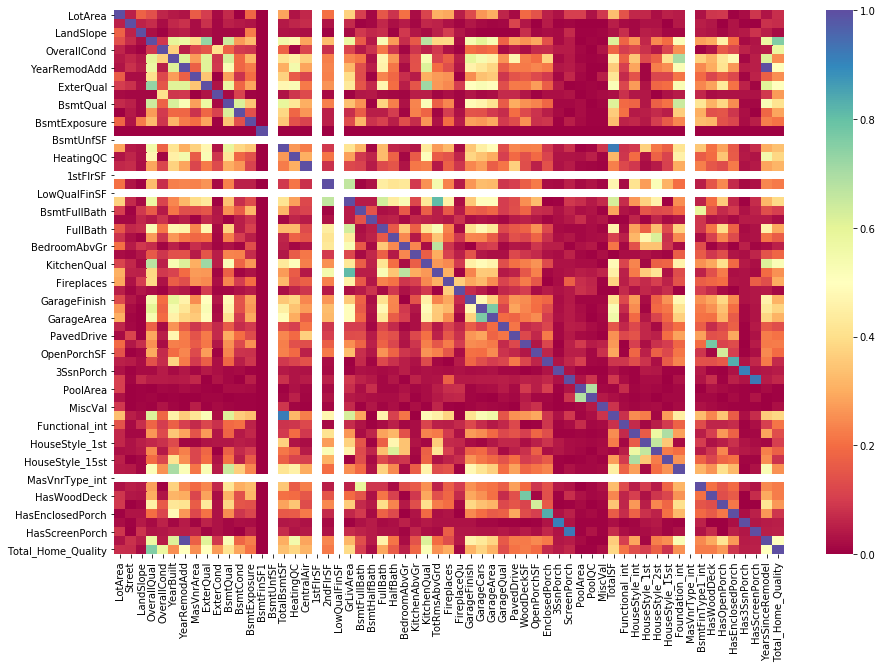

In [142]:
## Numerical to Categorical
# 嘗試不同的顏色"Spectral"：
corr_matrix=df_all.corr().abs()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,cmap='Spectral')

## Numerical to Categorical

In [143]:
# df_train[['OverallCond', 'SalePrice']].groupby(['OverallCond']).agg({'SalePrice':'median', 'OverallCond':'count'}).sort_values(by='SalePrice', ascending=False)
train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass']).agg({'SalePrice':'median', 'MSSubClass':'count'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,MSSubClass
MSSubClass,,
60,215600,296
120,192000,87
80,166500,58
75,163500,16
20,158250,530
70,156000,60
160,146000,63
40,142500,4
85,140750,20


In [144]:
# It helps to transform some numerical features to categorical
df_all.MSSubClass = df_all.MSSubClass.astype( str )
df_all.OverallCond = df_all.OverallCond.astype( str )
df_all.YrSold = df_all.YrSold.astype( str )
df_all.MoSold = df_all.MoSold.astype( str )
#df_all.YearBuilt = df_all.YearBuilt.astype ( str )

In [145]:
# handle skewness
train.SalePrice = np.log( train.SalePrice )
# exclude object型態的欄位
num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# na drop should be done series by series
# apply function>>幫助我們算出偏差系數
skewed_feats = df_all[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
print(skewed_feats)
# 選出dataframe大於0.75的人
skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# print(skewed_feats)
# 把大於0.75的要作正規化，變成常態分配
# np.log1p是log(1+x), 若直接取log會有log0的問題
df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )



LotArea                3.201280
Street                16.166862
LandSlope              5.019819
OverallQual            0.187856
YearBuilt             -0.599222
YearRemodAdd          -0.449122
MasVnrArea             3.094584
ExterQual             -0.783183
ExterCond             -0.865707
BsmtQual               1.269910
BsmtCond               3.610523
BsmtExposure          -1.250819
BsmtFinSF1             0.000000
BsmtUnfSF              0.000000
TotalBsmtSF            0.640639
HeatingQC              0.585766
CentralAir            -3.450943
1stFlrSF               0.000000
2ndFlrSF               1.912127
LowQualFinSF           0.000000
GrLivArea              1.019641
BsmtFullBath           0.620707
BsmtHalfBath           3.937277
FullBath               0.163295
HalfBath               0.693357
BedroomAbvGr           0.328268
KitchenAbvGr           4.292873
KitchenQual           -0.439817
TotRmsAbvGrd           0.750806
Fireplaces             0.728773
FireplaceQu            2.821004
GarageFi

In [146]:
df_all.describe(include = "O")

,MSSubClass,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,Electrical,Functional,GarageType,GarageCond,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,2908,2908,2908,2908,2908,2908,2908,2908,2908,2908,...,2908,2908,0.0,2908,2908,2908,2908,2908,2908,2908
unique,16,6,3,4,4,3,5,25,9,8,...,5,7,0.0,6,5,5,12,5,9,6
top,20,RL,missing,Reg,Lvl,AllPub,Inside,NAmes,Norm,Norm,...,SBrkr,Typ,NaN,TA,missing,missing,6,2007,WD,Normal
freq,1073,2254,2710,1859,2620,2905,2128,442,2503,2879,...,2661,2709,NaN,2643,2338,2805,500,687,2517,2394


In [147]:
# Numerical features

In [148]:
#'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#'YrSold', 'MoSold'



In [149]:
#df_all['YearBuilt2']=2019-df_all['YearBuilt'].str[0:].astype(int)
#df_all['GarageYrBlt2']=2019-df_all['GarageYrBlt'].str[0:].astype(int)
#df_all['YearBuilt2']

In [150]:
#df_all = df_all.drop(['YrSold'], axis = 1) # for 159 null values
#print(df_all.shape)
#df_all = df_all.drop(['MoSold'], axis = 1) # for 159 null values
#print(df_all.shape)
#df_all = df_all.drop(['YearBuilt'], axis = 1) # for 159 null values
#print(df_all.shape)
#df_all = df_all.drop(['GarageYrBlt'], axis = 1) # for 159 null values
#print(df_all.shape)

## One-Hot Encoding

In [151]:
df_all_dum = pd.get_dummies(df_all); df_all_dum.head()

LotArea  Street  LandSlope  OverallQual  YearBuilt  YearRemodAdd  \
train 0  9.042040     0.0        0.0            7       2003          2003   
      1  9.169623     0.0        0.0            6       1976          1976   
      2  9.328212     0.0        0.0            7       2001          2002   
      3  9.164401     0.0        0.0            7       1915          1970   
      4  9.565284     0.0        0.0            8       2000          2000   

         MasVnrArea  ExterQual  ExterCond  BsmtQual          ...            \
train 0    5.283204          1          2  0.693147          ...             
      1    4.018150          2          2  0.693147          ...             
      2    5.093750          1          2  0.693147          ...             
      3    4.018150          2          2  1.098612          ...             
      4    5.860786          1          2  0.693147          ...             

         SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
train 0               0             0             0            1   
      1               0             0             0            1   
      2               0             0             0            1   
      3               0             0             0            1   
      4               0             0             0            1   

         SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
train 0                      0                      0                     0   
      1                      0                      0                     0   
      2                      0                      0                     0   
      3                      1                      0                     0   
      4                      0                      0                     0   

         SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
train 0                     0                     1                      0  
      1                     0                     1                      0  
      2                     0                     1                      0  
      3                     0                     0                      0  
      4                     0                     1                      0  

[5 rows x 569 columns]

In [152]:
# 將NA的值填平均值
df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()

LotArea  Street  LandSlope  OverallQual  YearBuilt  YearRemodAdd  \
train 0  9.042040     0.0        0.0            7       2003          2003   
      1  9.169623     0.0        0.0            6       1976          1976   
      2  9.328212     0.0        0.0            7       2001          2002   
      3  9.164401     0.0        0.0            7       1915          1970   
      4  9.565284     0.0        0.0            8       2000          2000   

         MasVnrArea  ExterQual  ExterCond  BsmtQual          ...            \
train 0    5.283204          1          2  0.693147          ...             
      1    4.018150          2          2  0.693147          ...             
      2    5.093750          1          2  0.693147          ...             
      3    4.018150          2          2  1.098612          ...             
      4    5.860786          1          2  0.693147          ...             

         SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
train 0               0             0             0            1   
      1               0             0             0            1   
      2               0             0             0            1   
      3               0             0             0            1   
      4               0             0             0            1   

         SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
train 0                      0                      0                     0   
      1                      0                      0                     0   
      2                      0                      0                     0   
      3                      1                      0                     0   
      4                      0                      0                     0   

         SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
train 0                     0                     1                      0  
      1                     0                     1                      0  
      2                     0                     1                      0  
      3                     0                     0                      0  
      4                     0                     1                      0  

[5 rows x 569 columns]

In [153]:
#from sklearn.preprocessing import LabelEncoder
#cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
#for c in cols:
#    lbl = LabelEncoder() 
#    lbl.fit(list(df_all[c].values)) 
#    df_all[c] = lbl.transform(list(df_all[c].values))

# shape        
print('Shape all_data: {}'.format(df_all.shape))

Shape all_data: (2908, 93)


In [154]:
## Standardization

## Standardization

In [155]:
# normalization helps a bit
from sklearn import preprocessing

#num_feats = df_all_dum.select_dtypes( exclude = [ 'object' ] ).columns
df_all_dum[ num_feats ] = preprocessing.scale( df_all_dum[ num_feats ] )
df_all_dum[ num_feats ].head()

LotArea   Street  LandSlope  OverallQual  YearBuilt  YearRemodAdd  \
train 0 -0.092473 -0.06162   -0.21694     0.651672   1.045890      0.897914   
      1  0.165799 -0.06162   -0.21694    -0.059955   0.155353     -0.393897   
      2  0.486841 -0.06162   -0.21694     0.651672   0.979924      0.850069   
      3  0.155229 -0.06162   -0.21694     0.651672  -1.856601     -0.680967   
      4  0.966758 -0.06162   -0.21694     1.363298   0.946941      0.754379   

         MasVnrArea  ExterQual  ExterCond  BsmtQual         ...          \
train 0    0.970836  -1.043222   0.223493 -0.463129         ...           
      1   -0.601285   0.683408   0.223493 -0.463129         ...           
      2    0.735397  -1.043222   0.223493 -0.463129         ...           
      3   -0.601285   0.683408   0.223493  0.644436         ...           
      4    1.688616  -1.043222   0.223493 -0.463129         ...           

         Foundation_int  MasVnrType_int  BsmtFinType1_int  HasWoodDeck  \
train 0        0.942513             0.0          1.166019     0.955593   
      1       -0.397745             0.0          0.692974    -1.046471   
      2        0.942513             0.0          1.166019     0.955593   
      3       -1.738004             0.0          0.692974     0.955593   
      4        0.942513             0.0          1.166019    -1.046471   

         HasOpenPorch  HasEnclosedPorch  Has3SsnPorch  HasScreenPorch  \
train 0     -0.896020          0.432364      0.113523        0.310694   
      1      1.116047          0.432364      0.113523        0.310694   
      2     -0.896020          0.432364      0.113523        0.310694   
      3     -0.896020         -2.312865      0.113523        0.310694   
      4     -0.896020          0.432364      0.113523        0.310694   

         YearsSinceRemodel  Total_Home_Quality  
train 0          -0.888204            0.205234  
      1           0.355966            1.374327  
      2          -0.840352            0.205234  
      3           0.595230            0.205234  
      4          -0.744646            0.789781  

[5 rows x 60 columns]

In [156]:
np.any(np.isnan(df_all_dum))
df_all_dum.columns[df_all_dum.isna().any()].tolist()

[]

In [157]:
# 查詢是否有重複的欄位
df_all_dum.columns[df_all_dum.columns.duplicated()]

Index([], dtype='object')

## Training Start

In [158]:
# inputs
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
X = df_all_dum[:train.shape[0]]
y = train.SalePrice
#把train data與test分開
X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 40)

X_test = df_all_dum[ train.shape[0]: ]

In [159]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5))
    return(rmse)

In [160]:
from sklearn.linear_model import LassoCV
model_Lasso = LassoCV( alphas = [ 1, 0.1, 0.01, 0.001, 0.0005, 0.0004, 0.0003, 0.0002 ],
                       max_iter = 2000 ).fit( X, y )
print( rmse_cv( model_Lasso ), model_Lasso.alpha_ )

[0.12233584 0.10947389 0.10444328 0.11210003 0.10694586] 0.001


In [161]:
coef = pd.Series( model_Lasso.coef_, index = X.columns )
print( sum(coef != 0), sum(coef == 0))

78 491


Text(0.5, 1.0, 'Coefficients in Model Lasso')

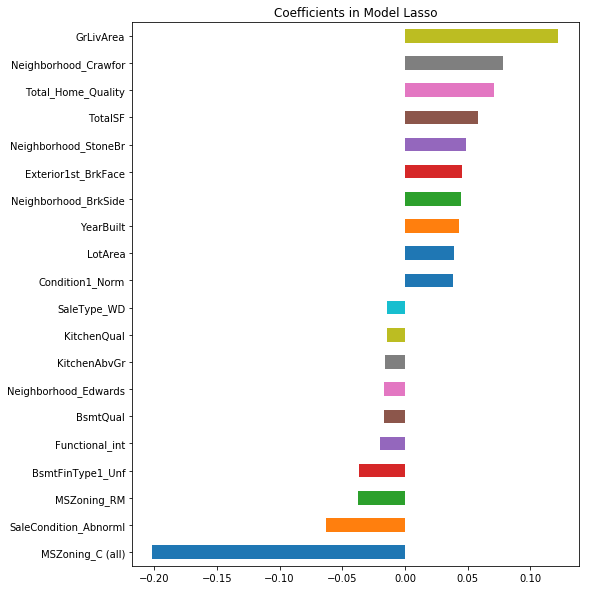

In [162]:
important_coef = pd.concat( [coef.sort_values().head(10), coef.sort_values().tail(10)] )
rcParams['figure.figsize'] = (8.0, 10.0)
important_coef.plot(kind = 'barh')
plt.title('Coefficients in Model Lasso')

In [163]:
from sklearn import metrics
preds = model_Lasso.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, preds)))
print('  R2:', metrics.r2_score( y, preds ) )

RMSE: 0.10122944997161544
  R2: 0.9345872655066909


In [164]:
val_preds = model_Lasso.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.11803673596148141
  R2: 0.9130406174855094


In [165]:
y_answer_Lasso = model_Lasso.predict( X_test )
y_answer_Lasso = np.exp(y_answer_Lasso)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_Lasso}, index=test.Id).head())

          SalePrice
Id                 
1461  115221.007864
1462  156556.840659
1463  177812.833031
1464  191844.551806
1465  196063.805693


In [166]:
pd.DataFrame({'SalePrice': y_answer_Lasso}, index=test.Id).to_csv('submission_Lasso.csv')

## XGBoost

In [167]:
import xgboost as xgb

In [168]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = True)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
# print(list(kf.split(X)))
for train_index, val_index in kf.split(X):
#     print('train_index:', train_index)
#     print('val_index:', val_index)
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice_N'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    
    model_XGB = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    model_XGB.fit(X_train, y_train)
    y_pred = model_XGB.predict(X_val)
    y_ans = model_XGB.predict(X_test)
#     print(y_ans.shape)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_XGB = pred_tmp/5

RMSE: 0.13233131799771666
  R2: 0.8969292099716917
RMSE: 0.1183086167025186
  R2: 0.9133810819335935
RMSE: 0.12332587102451825
  R2: 0.9030725276784809
RMSE: 0.11324990334883685
  R2: 0.917740033192034
RMSE: 0.11542300779907888
  R2: 0.9012529272904799


In [169]:
model_XGB = XGBRegressor(base_score=0.5,colsample_bytree=0.7, gamma=0.0468, 
                             learning_rate=0.01, max_depth=7, 
                             min_child_weight=4, n_estimators=5000,objective='reg:linear',
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
#colsample_bytree=0.4603, gamma=0.0468, 
#                             learning_rate=0.1, max_depth=7, 
#                             min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571,
#                             subsample=0.5213, silent=1,
#                             random_state =7, nthread = -1


#colsample_bylevel=1,colsample_bytree=1, gamma=0, 
#                             learning_rate=0.1, max_delta_step=0,max_depth=7, 
#                             min_child_weight=1,missing=None, n_estimators=2200,nthread=-1,objective='reg:linear',
#                             reg_alpha=0, reg_lambda=1,scale_pos_weight=1,seed=1850,
#                              silent=True,subsample=1,
#                             random_state =7

model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.07622648044461788
  R2: 0.9629097051264951


In [170]:
val_preds = model_XGB.predict(X_val)

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )


RMSE: 0.07401704111334895
  R2: 0.9593928139673923


In [171]:
y_answer_XGB = model_XGB.predict( X_test )
y_answer_XGB = np.exp(y_answer_XGB)
print(pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).head())

          SalePrice
Id                 
1461  121820.078125
1462  162699.390625
1463  177104.890625
1464  187086.093750
1465  196429.500000


In [172]:
pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).to_csv('submission_xgb.csv')

## Decision Tree

In [173]:
#https://www.itread01.com/content/1545151168.html

In [174]:
from sklearn.model_selection import GridSearchCV
xgb1 = XGBRegressor()
#parameters={'colsample_bytree':[0.4603], 'gamma':[0.0468], 
#                             'learning_rate':[0.1,0.05,0.01], 'max_depth':[6,7,8], 
#                             'min_child_weight':[4], 'n_estimators':[2200],
#                             'reg_alpha':[0.4640], 'reg_lambda':[0.8571],
#                             'subsample:':[0.5213], 'silent':[1],
#                             'random_state' :[7], 'nthread' : [-1]}

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.01], #so called `eta` value
              'max_depth': [7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

#xgb_grid = GridSearchCV(xgb1,
#                        parameters,
#                        cv = 2,
#                        n_jobs = 5,
#                        verbose=True)

#xgb_grid.fit(X,y)

#print(xgb_grid.best_score_)
#print(xgb_grid.best_params_)

In [175]:
#val_preds = xgb_grid.predict(X_val)

#print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_val, val_preds ) )

In [176]:
#y_answer_XGB = xgb_grid.predict( X_test )
#y_answer_XGB = np.exp(y_answer_XGB)
#print(pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).head())

In [177]:
#pd.DataFrame({'SalePrice': y_answer_XGB}, index=test.Id).to_csv('submission_xgb.csv')

## SVR

In [178]:
# KFold Data Split

from sklearn.svm import SVR
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = None, shuffle = False)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
for train_index, val_index in kf.split(X):
    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice'], index = train_index)
    y_train = y.values[ train_index ]
    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    model_SVR = SVR(kernel='rbf', gamma=0.002)
    model_SVR.fit(X_train, y_train)
    y_pred = model_SVR.predict(X_val)
    y_ans = model_SVR.predict(X_test)
    pred_tmp+=np.exp(y_ans)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
    print('  R2:', metrics.r2_score(y_val, y_pred))
y_answer_SVR = pred_tmp/5

RMSE: 0.12835536899535394
  R2: 0.896809440950255
RMSE: 0.12234102381994147
  R2: 0.8993755963295882
RMSE: 0.11347597926089817
  R2: 0.9153034898782904
RMSE: 0.11374675961716961
  R2: 0.9174689925594554
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [179]:
y_pred = model_SVR.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.10138901729916881
  R2: 0.934380883634592


In [180]:
val_preds = model_SVR.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [181]:
model_SVR = SVR(kernel='rbf', gamma=0.002)
model_SVR.fit(X, y)
y_answer_SVR = model_SVR.predict( X_test )
y_answer_SVR = np.exp(y_answer_SVR)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_SVR}, index=test.Id).head())

          SalePrice
Id                 
1461  119564.485424
1462  156653.579860
1463  171243.151646
1464  190406.991972
1465  193886.623344


In [182]:
pd.DataFrame({'SalePrice': y_answer_SVR}, index=test.Id).to_csv('submission_SVR.csv')

In [185]:
#RandomForestClassifier 效果不好
clf = RandomForestClassifier()
clf.fit(X, y.astype('int'))
y_pred = clf.predict(X)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

RMSE: 0.6077254179680507
  R2: -1.357563246168168


In [186]:
val_preds = clf.predict(X_val)
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 0.6026382665096865
  R2: -1.2309892387712504


In [187]:

y_answer_rm = clf.predict( X_test )
y_answer_rm = np.exp(y_answer_rm)
# print(pd.DataFrame(data=y_answer, columns=['SalePrice'], index=X_test.index).head())
print(pd.DataFrame({'SalePrice': y_answer_rm}, index=test.Id).head())

          SalePrice
Id                 
1461   59874.141715
1462   59874.141715
1463  162754.791419
1464  162754.791419
1465  162754.791419


## Blending

In [96]:
# Lasso + SVR
y_answer = y_answer_Lasso * 0.75 + y_answer_SVR * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LS_Best.csv')

          SalePrice
Id                 
1461  116306.877254
1462  156581.025459
1463  176170.412685
1464  191485.161847
1465  195519.510106
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [97]:
# Lasso + XGB
y_answer = y_answer_Lasso * 0.75 + y_answer_XGB * 0.25
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LX.csv')

          SalePrice
Id                 
1461  116870.775429
1462  158092.478150
1463  177635.847430
1464  190654.937292
1465  196155.229270
RMSE: 0.11178810224904052
  R2: 0.9232328827938405


In [98]:
# Lasso + SVR + XGB
y_answer = y_answer_Lasso * 0.72 + y_answer_SVR * 0.04 + y_answer_XGB * 0.24
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
#print('  R2:', metrics.r2_score( y_answer, val_preds ) )
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX.csv')

          SalePrice
Id                 
1461  116978.523439
1462  158034.920031
1463  177380.137723
1464  190645.017135
1465  196064.483158
RMSE: 0.11178810224904052


In [99]:
# Lasso + SVR + XGB -2
y_answer = (y_answer_Lasso + y_answer_SVR + y_answer_XGB) /3
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())
pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_LSX3.csv')

          SalePrice
Id                 
1461  118868.523805
1462  158636.603715
1463  175386.958434
1464  189779.212509
1465  195459.976346


In [100]:
# SVR + XGB
y_answer = y_answer_SVR * 0.3 + y_answer_XGB * 0.7
print(pd.DataFrame({'SalePrice': y_answer}, index=test.Id).head())

pd.DataFrame({'SalePrice': y_answer}, index=test.Id).to_csv('submission_SX.csv')

          SalePrice
Id                 
1461  121143.400315
1462  160885.644271
1463  175346.367369
1464  188082.363217
1465  195666.627628
